In [1]:
# %pip install matplotlib networkx

In [2]:
import sys
import logging
from pathlib import Path

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

PROJECT_ID = "dark-data-discovery"
LOCATION = "us-central1"

print(f"📍 GCP Project: {PROJECT_ID}")
print(f"📍 Location: {LOCATION}")

📍 GCP Project: dark-data-discovery
📍 Location: us-central1


In [3]:
from google.cloud import secretmanager

def get_secret(project_id, secret_id, version_id="latest"):
    client = secretmanager.SecretManagerServiceClient()
    name = f"projects/{project_id}/secrets/{secret_id}/versions/{version_id}"
    response = client.access_secret_version(request={"name": name})
    return response.payload.data.decode("UTF-8")

try:
    key = get_secret(PROJECT_ID, "ANTHROPIC_API_KEY")
    print(f"✅ ANTHROPIC_API_KEY: {'*' * 10}{key[-4:]}")
except Exception as e:
    print(f"❌ Failed to get ANTHROPIC_API_KEY: {e}")

✅ ANTHROPIC_API_KEY: **********uwAA


In [4]:
from hegemon import create_hegemon_graph, get_settings, DebateState, FinalPlan

print("✅ HEGEMON imported!")
print(f"Version: {__import__('hegemon').__version__}")

2025-09-30 23:17:17,847 - INFO - ✅ ANTHROPIC_API_KEY loaded from Secret Manager
2025-09-30 23:17:17,849 - INFO - ✅ Google Gemini will use Vertex AI (ADC authentication)
2025-09-30 23:17:17,912 - INFO - ✅ OPENAI_API_KEY loaded from Secret Manager


✅ HEGEMON imported!
Version: 0.1.0


In [5]:
settings = get_settings()

print(f"✅ Settings initialized")
print(f"\nConfiguration:")
print(f"  Project: {settings.gcp_project_id}")
print(f"  Location: {settings.gcp_location}")
print(f"  Katalizator: {settings.katalizator.model} ({settings.katalizator.provider})")
print(f"  Sceptyk: {settings.sceptyk.model} ({settings.sceptyk.provider}, Vertex AI: {settings.sceptyk.use_vertex_ai})")
print(f"  Gubernator: {settings.gubernator.model} ({settings.gubernator.provider})")
print(f"  Syntezator: {settings.syntezator.model} ({settings.syntezator.provider})")
print(f"\nDebate Config:")
print(f"  Consensus threshold: {settings.debate.consensus_threshold}")
print(f"  Max cycles: {settings.debate.max_cycles}")

2025-09-30 23:17:21,398 - INFO - ✅ Sceptyk will use Vertex AI (Application Default Credentials)
2025-09-30 23:17:21,400 - INFO - ✅ All required authentication validated
2025-09-30 23:17:21,401 - INFO - ✅ HEGEMON Settings initialized (GCP Project: dark-data-discovery)


✅ Settings initialized

Configuration:
  Project: dark-data-discovery
  Location: us-central1
  Katalizator: claude-sonnet-4-5-20250929 (anthropic)
  Sceptyk: gemini-2.5-pro (google, Vertex AI: True)
  Gubernator: claude-sonnet-4-5-20250929 (anthropic)
  Syntezator: claude-opus-4-1-20250805 (anthropic)

Debate Config:
  Consensus threshold: 0.7
  Max cycles: 5


In [6]:
graph = create_hegemon_graph()

print("✅ HEGEMON graph created!")
print(f"\nGraph structure:")
print(f"  Nodes: {list(graph.nodes.keys())}")

2025-09-30 23:17:21,410 - INFO - 🏗️ Building HEGEMON graph...
2025-09-30 23:17:21,429 - INFO - ✅ HEGEMON graph compiled successfully!
2025-09-30 23:17:21,430 - INFO -    Nodes: ['__start__', 'katalizator', 'sceptyk', 'gubernator', 'syntezator', 'increment_cycle']


✅ HEGEMON graph created!

Graph structure:
  Nodes: ['__start__', 'katalizator', 'sceptyk', 'gubernator', 'syntezator', 'increment_cycle']


In [7]:
MISSION = """
Design and implement professional book layout system in Adobe InDesign for 280-page 
technical programming book with complex formatting.

BOOK SPECIFICATIONS:
- Title: "Advanced Python Patterns: A Practitioner's Guide"
- Content: 12 chapters, 280 pages
- Format: 7" x 10" trade paperback (Crown Quarto)
- Output: Print-on-demand (IngramSpark) + digital PDF/ePub
- Audience: professional software engineers

CONTENT COMPLEXITY:
- 50 code blocks (10-200 lines each, Python syntax highlighting required)
- 30 technical diagrams (flowcharts, UML, architecture)
- Mathematical notation in 8 sections
- Callout boxes: "Best Practices", "Common Pitfalls", "Performance Tips"
- Index: 500+ entries with cross-references
- Bibliography: 120 citations (IEEE format)

CONSTRAINTS:
- Timeline: 3 weeks from manuscript to print-ready PDF
- Budget: $2,000 (layout, stock images, proofreading)
- Tools: InDesign 2024, no plugins >$50
- Print specs: 300 DPI, CMYK, 0.125" bleed, PDF/X-1a:2001
- Accessibility: tagged PDF for screen readers (WCAG 2.1 AA)

DESIGN REQUIREMENTS:
- Typography: serif body (10.5-11pt), sans-serif headings
- Code blocks: monospace (9pt), light gray background
- 4 heading levels, clear chapter breaks
- Running headers: chapter (verso) / section (recto)
- Page numbers: bottom center (omit on chapter openers)
- Margin notes: 1.5" outer for annotations
- 2-color design (black + accent color)

DELIVERABLES:
- InDesign master template with paragraph/character styles
- Automated TOC system (updates dynamically)
- Figure/table numbering (e.g., "Figure 3.2")
- Print-ready PDF + cover PDF
- ePub export settings configured
- 8-page style guide for future editions

SUCCESS CRITERIA:
- Zero errors on IngramSpark preflight
- 10pt minimum code font in printed proof
- Index accuracy <1% error rate
- Template allows chapter updates in <30 min
- Passes Adobe accessibility checker (0 errors)
"""

print("📋 Mission defined:")
print(MISSION)

📋 Mission defined:

Design and implement professional book layout system in Adobe InDesign for 280-page 
technical programming book with complex formatting.

BOOK SPECIFICATIONS:
- Title: "Advanced Python Patterns: A Practitioner's Guide"
- Content: 12 chapters, 280 pages
- Format: 7" x 10" trade paperback (Crown Quarto)
- Output: Print-on-demand (IngramSpark) + digital PDF/ePub
- Audience: professional software engineers

CONTENT COMPLEXITY:
- 50 code blocks (10-200 lines each, Python syntax highlighting required)
- 30 technical diagrams (flowcharts, UML, architecture)
- Mathematical notation in 8 sections
- Callout boxes: "Best Practices", "Common Pitfalls", "Performance Tips"
- Index: 500+ entries with cross-references
- Bibliography: 120 citations (IEEE format)

CONSTRAINTS:
- Timeline: 3 weeks from manuscript to print-ready PDF
- Budget: $2,000 (layout, stock images, proofreading)
- Tools: InDesign 2024, no plugins >$50
- Print specs: 300 DPI, CMYK, 0.125" bleed, PDF/X-1a:2001
- A

In [8]:
initial_state = {
    "mission": MISSION,
    "contributions": [],
    "cycle_count": 1,
    "current_consensus_score": 0.0,
    "final_plan": None,
}

print("🚀 Starting HEGEMON debate...\n")
print("=" * 80)

final_state = graph.invoke(initial_state)

print("\n" + "=" * 80)
print("✅ Debate complete!")

2025-09-30 23:17:21,451 - INFO - 🔥 KATALIZATOR (anthropic/claude-sonnet-4-5-20250929): Generating Thesis (Cycle 1)


🚀 Starting HEGEMON debate...



2025-09-30 23:17:39,220 - INFO - HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
2025-09-30 23:17:39,242 - INFO - ✅ KATALIZATOR: Thesis generated (2705 chars)
2025-09-30 23:17:39,245 - INFO - ⚔️ SCEPTYK (google/gemini-2.5-pro via Vertex AI): Generating Antithesis (Cycle 1)
2025-09-30 23:17:39,247 - WARNING - Unexpected argument 'timeout' provided to ChatVertexAI.
/home/jupyter/olga_zydziak/version_beta/Folder/hegemon_mvp/hegemon/agents.py:219: UserWarning: WARNING! timeout is not default parameter.
                timeout was transferred to model_kwargs.
                Please confirm that timeout is what you intended.
  llm = get_llm_for_agent("Sceptyk")
2025-09-30 23:18:03,765 - INFO - ✅ SCEPTYK: Antithesis generated (1764 chars)
2025-09-30 23:18:03,768 - INFO - ⚖️ GUBERNATOR (anthropic/claude-sonnet-4-5-20250929): Evaluating Consensus (Cycle 1)
2025-09-30 23:18:16,132 - INFO - HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
2025-


✅ Debate complete!


In [9]:
print("\n" + "=" * 80)
print("📊 DEBATE SUMMARY")
print("=" * 80 + "\n")

print(f"Total cycles: {final_state['cycle_count']}")
print(f"Final consensus score: {final_state['current_consensus_score']:.2f}")
print(f"Total contributions: {len(final_state['contributions'])}")

print("\n" + "=" * 80)
print("📝 DEBATE HISTORY")
print("=" * 80 + "\n")

for contrib in final_state['contributions']:
    print(f"\n{'='*80}")
    print(f"Agent: {contrib.agent_id} | Type: {contrib.type} | Cycle: {contrib.cycle}")
    print(f"{'='*80}")
    print(f"\n{contrib.content[:500]}...")
    print(f"\nRationale: {contrib.rationale}")


📊 DEBATE SUMMARY

Total cycles: 3
Final consensus score: 0.73
Total contributions: 10

📝 DEBATE HISTORY


Agent: Katalizator | Type: Thesis | Cycle: 1

The core strategic insight is to treat this InDesign project as a modular automation challenge rather than a traditional design engagement. Success hinges on investing 60% of the timeline (roughly 12 days) in building a bulletproof template infrastructure with comprehensive paragraph and character styles, then executing content population in the remaining 40%. This front-loaded approach transforms a potential chaos of manual formatting into a systematic assembly process that meets all technical ...

Rationale: Generated thesis using anthropic/claude-sonnet-4-5-20250929. Length: 2705 characters.

Agent: Sceptyk | Type: Antithesis | Cycle: 1

While the modular, automation-first approach is commendable in theory, it rests on a dangerously optimistic assessment of the project's complexity and timeline. The proposed 60/40 time allocation cr

In [10]:
final_plan = final_state['final_plan']

print("\n" + "=" * 80)
print("🎯 FINAL STRATEGIC PLAN")
print("=" * 80 + "\n")

print("📋 MISSION OVERVIEW:")
print("-" * 80)
print(final_plan.mission_overview)

print("\n\n👥 REQUIRED AGENTS:")
print("-" * 80)
for agent in final_plan.required_agents:
    print(f"\n{agent.role}")
    print(f"  Description: {agent.description}")
    print(f"  Skills: {', '.join(agent.required_skills)}")

print("\n\n📊 WORKFLOW ({} steps):".format(len(final_plan.workflow)))
print("-" * 80)
for step in final_plan.workflow:
    print(f"\nStep {step.step_id}: {step.assigned_agent_role}")
    print(f"  Task: {step.description}")
    if step.dependencies:
        print(f"  Dependencies: {step.dependencies}")

print("\n\n⚠️ RISK ANALYSIS:")
print("-" * 80)
print(final_plan.risk_analysis)


🎯 FINAL STRATEGIC PLAN

📋 MISSION OVERVIEW:
--------------------------------------------------------------------------------
Execute a 21-day InDesign book production system for 280-page technical Python programming book, synthesizing front-loaded validation (Thesis) with parallel workflow resilience (Antithesis). Strategy: Days 1-5 parallel validation (digital template + physical proof ordering + Chapter 1 vertical slice), Days 6-16 systematic batch production with iterative refinement, Days 17-21 quality assurance and delivery. This transcends sequential vs iterative debate by validating critical technical risks early while maintaining workflow flexibility. Expected: First-pass IngramSpark approval, <0.5% index error rate, reusable template system.


👥 REQUIRED AGENTS:
--------------------------------------------------------------------------------

InDesign Automation Specialist
  Description: Develops master template architecture with 40+ paragraph/character styles, configures GRE

In [11]:
# ============================================================================
# CELL 13: Export to JSON
# ============================================================================
import json
from datetime import datetime

output = {
    "timestamp": datetime.now().isoformat(),
    "mission": final_state['mission'],
    "debate_summary": {
        "total_cycles": final_state['cycle_count'],
        "final_consensus_score": final_state['current_consensus_score'],
        "total_contributions": len(final_state['contributions']),
    },
    "debate_history": [
        {
            "agent_id": c.agent_id,
            "type": c.type,
            "cycle": c.cycle,
            "content": c.content,
            "rationale": c.rationale,
        }
        for c in final_state['contributions']
    ],
    "final_plan": {
        "mission_overview": final_plan.mission_overview,
        "required_agents": [
            {
                "role": a.role,
                "description": a.description,
                "required_skills": a.required_skills,
            }
            for a in final_plan.required_agents
        ],
        "workflow": [
            {
                "step_id": s.step_id,
                "description": s.description,
                "assigned_agent_role": s.assigned_agent_role,
                "dependencies": s.dependencies,
            }
            for s in final_plan.workflow
        ],
        "risk_analysis": final_plan.risk_analysis,
    }
}

output_path = Path("output")
output_path.mkdir(exist_ok=True)

filename = output_path / f"hegemon_output_{datetime.now().strftime('%Y%m%d_%H%M%S')}.json"

with open(filename, "w", encoding="utf-8") as f:
    json.dump(output, f, indent=2, ensure_ascii=False)

print(f"✅ Results exported to: {filename}")
print(f"📊 File size: {filename.stat().st_size / 1024:.1f} KB")

✅ Results exported to: output/hegemon_output_20250930_232053.json
📊 File size: 32.0 KB


/var/tmp/ipykernel_26910/1481772580.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


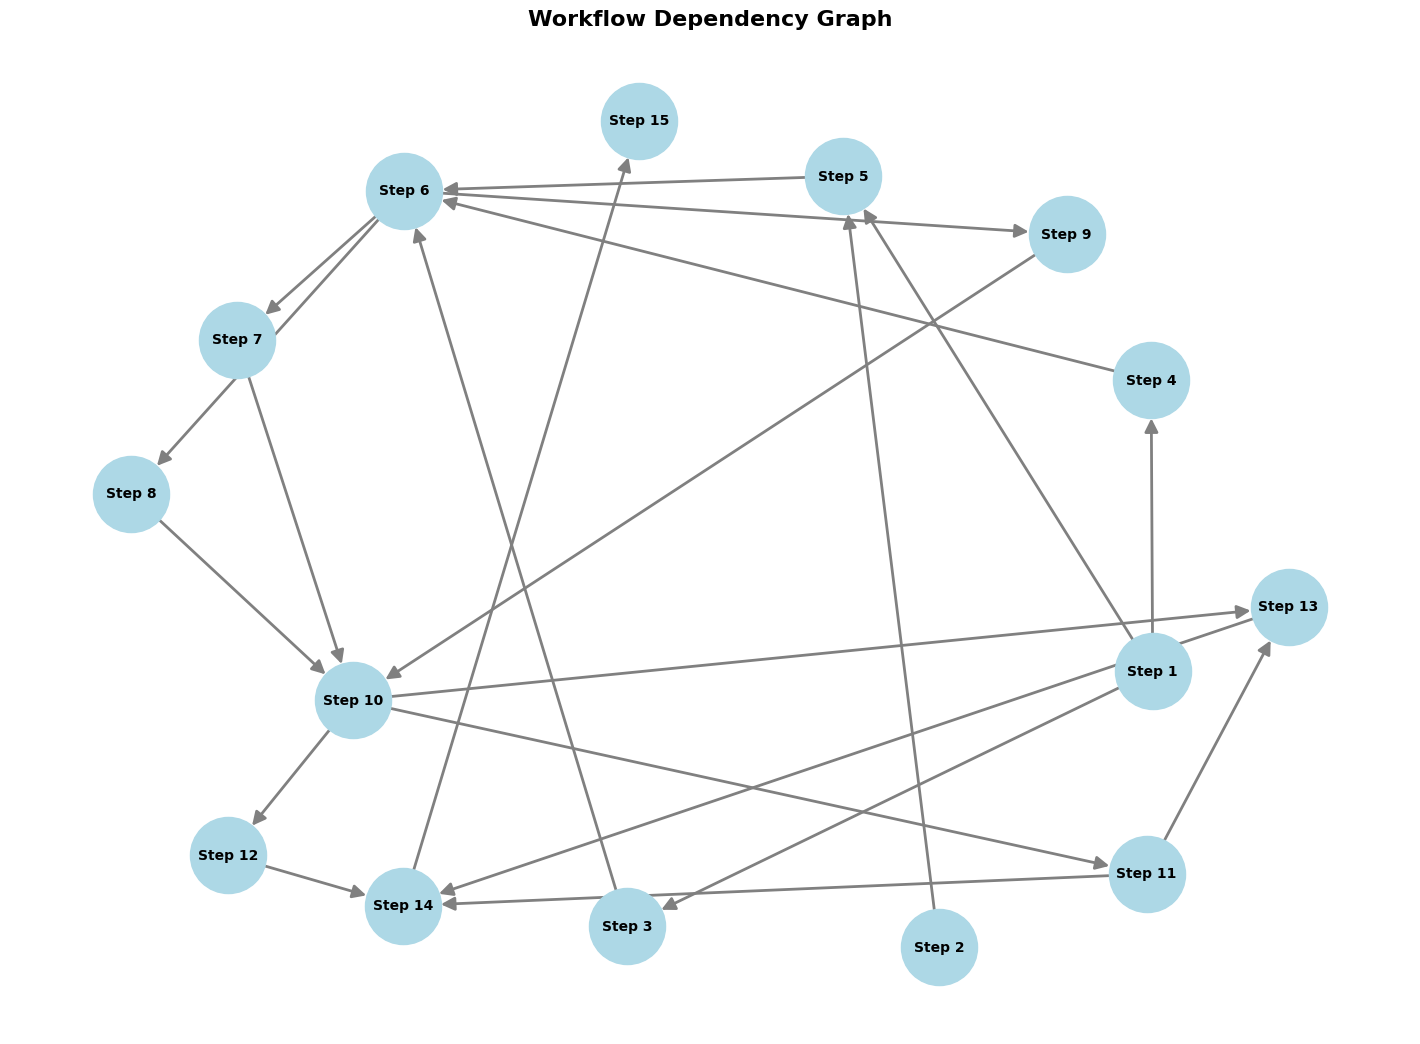

✅ Workflow graph saved!


In [12]:
# ============================================================================
# CELL 14: Visualize Workflow as Graph (Optional)
# ============================================================================
try:
    import matplotlib.pyplot as plt
    import networkx as nx
    
    G = nx.DiGraph()
    
    for step in final_plan.workflow:
        G.add_node(step.step_id, label=f"Step {step.step_id}\n{step.assigned_agent_role}")
        for dep in step.dependencies:
            G.add_edge(dep, step.step_id)
    
    plt.figure(figsize=(14, 10))
    pos = nx.spring_layout(G, k=2, iterations=50)
    
    nx.draw(G, pos, 
            node_color='lightblue', 
            node_size=3000,
            with_labels=True,
            labels={n: f"Step {n}" for n in G.nodes()},
            font_size=10,
            font_weight='bold',
            arrows=True,
            arrowsize=20,
            edge_color='gray',
            width=2)
    
    plt.title("Workflow Dependency Graph", fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(output_path / "workflow_graph.png", dpi=150, bbox_inches='tight')
    plt.show()
    
    print("✅ Workflow graph saved!")
    
except ImportError:
    print("⚠️ matplotlib/networkx not installed. Skipping visualization.")
    print("Install with: pip install matplotlib networkx")

In [13]:
# ============================================================================
# CELL 15: Quick Stats
# ============================================================================
print("\n" + "=" * 80)
print("📈 QUICK STATS")
print("=" * 80 + "\n")

print(f"Mission length: {len(MISSION)} characters")
print(f"Debate cycles: {final_state['cycle_count']}")
print(f"Final consensus: {final_state['current_consensus_score']:.2%}")
print(f"Total contributions: {len(final_state['contributions'])}")
print(f"  - Theses: {sum(1 for c in final_state['contributions'] if c.type == 'Thesis')}")
print(f"  - Antitheses: {sum(1 for c in final_state['contributions'] if c.type == 'Antithesis')}")
print(f"  - Evaluations: {sum(1 for c in final_state['contributions'] if c.type == 'Evaluation')}")
print(f"  - Final Plans: {sum(1 for c in final_state['contributions'] if c.type == 'FinalPlan')}")

print(f"\nFinal Plan:")
print(f"  - Required agents: {len(final_plan.required_agents)}")
print(f"  - Workflow steps: {len(final_plan.workflow)}")
print(f"  - Mission overview length: {len(final_plan.mission_overview)} chars")
print(f"  - Risk analysis length: {len(final_plan.risk_analysis)} chars")

total_chars = sum(len(c.content) for c in final_state['contributions'])
print(f"\nTotal debate output: {total_chars:,} characters ({total_chars/1024:.1f} KB)")


📈 QUICK STATS

Mission length: 1901 characters
Debate cycles: 3
Final consensus: 73.00%
Total contributions: 10
  - Theses: 3
  - Antitheses: 3
  - Evaluations: 3
  - Final Plans: 1

Final Plan:
  - Required agents: 5
  - Workflow steps: 15
  - Mission overview length: 635 chars
  - Risk analysis length: 708 chars

Total debate output: 16,694 characters (16.3 KB)
